# Interpretowalność

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/tweets_features.csv", encoding='latin', nrows=10000)
df.drop(['is_after_certain_day', 'Date', 'User', 'Text', 'Time', 'Full_date'], axis=1, inplace=True)
df.head()

Target  Weekday  Length  Hashtags  HasHashtags  Mentions  HasMentions  \
0       0        3      67         0        False         1         True   
1       1        3      93         0        False         1         True   
2       1        0      27         0        False         0        False   
3       0        3     100         0        False         0        False   
4       0        4      52         0        False         0        False   

   ExclamationMarks  HasExclamationMarks Emoticons  ...    w2v_90    w2v_91  \
0                 0                False        []  ...  0.426355  0.105600   
1                 0                False        []  ...  0.893100  0.385402   
2                 1                 True        []  ...  0.590157  0.242431   
3                 0                False        []  ...  0.741138  0.014045   
4                 1                 True        []  ...  0.621242  0.201937   

     w2v_92    w2v_93    w2v_94    w2v_95    w2v_96    w2v_97    w2v_98  \
0  0.099900  0.141384  0.683017  0.307975  0.141498 -0.470852 -0.146050   
1 -0.035950 -0.465414  1.386158  0.869907  0.718067 -0.696911 -0.041971   
2 -0.339337  0.507457  1.383398  1.200003  0.258323 -0.451583  0.037492   
3 -0.037039 -0.300930  1.460556  0.542765  0.764829 -0.621368 -0.208227   
4 -0.061574  0.177444  1.245472  0.712410  0.349455 -0.450614  0.096795   

     w2v_99  
0  0.013814  
1 -0.195380  
2  0.057117  
3 -0.209104  
4  0.056020  

[5 rows x 541 columns]

In [3]:
selected_columns = ['Negative_VADER', 'skewed_hour_dist', 'Weekday', 'Compound_VADER',
                    'skewed_week_dist', 'w2v_11', 'Mentions', 'Polarity_TB', 'w2v_27',
                    'w2v_53', 'Hour', 'w2v_44', 'w2v_84', 'embedding_16', 'w2v_47',
                    'Positive_VADER', 'embedding_239', 'Length', 'embedding_284',
                    'embedding_263', 'embedding_153', 'embedding_301', 'w2v_76',
                    'embedding_220', 'embedding_366', 'w2v_29', 'w2v_61', 'embedding_28',
                    'embedding_168', 'embedding_272', 'embedding_253', 'embedding_85',
                    'embedding_285', 'w2v_12', 'w2v_31', 'embedding_120', 'embedding_254',
                    'w2v_73', 'w2v_67', 'embedding_174', 'embedding_225', 'embedding_297',
                    'embedding_68', 'embedding_211', 'embedding_178']

df = df[selected_columns + ['Target']]
df.head()

Negative_VADER  skewed_hour_dist  Weekday  Compound_VADER  \
0             0.0            1.0000        3          0.0000   
1             0.0            0.8750        3          0.5994   
2             0.0            0.5625        0          0.6239   
3             0.0            0.8750        3          0.0000   
4             0.0            0.1875        4          0.0000   

   skewed_week_dist    w2v_11  Mentions  Polarity_TB    w2v_27    w2v_53  ...  \
0              0.25 -0.426647         1         0.00 -0.158230 -0.252697  ...   
1              0.25 -1.066094         1         0.50 -0.325089 -0.317187  ...   
2              1.00 -1.692307         0         0.75 -0.148419 -0.052130  ...   
3              0.25 -1.166031         0         0.00 -0.408315 -0.214376  ...   
4              0.50 -1.374051         0         0.00 -0.749436 -0.283192  ...   

   embedding_254    w2v_73    w2v_67  embedding_174  embedding_225  \
0       0.002508 -0.258442  0.415639       0.037805       0.023073   
1      -0.035127 -0.517884  0.406989       0.029344      -0.023042   
2      -0.024004 -0.447232  1.059734       0.036808      -0.030746   
3      -0.032666 -0.424421  0.582568       0.041751       0.007699   
4      -0.036926 -0.467247  0.783400       0.103736      -0.081758   

   embedding_297  embedding_68  embedding_211  embedding_178  Target  
0      -0.057559     -0.135656       0.007234      -0.003340       0  
1      -0.045431      0.073618      -0.035375       0.003905       1  
2       0.025848     -0.069569      -0.011779      -0.077702       1  
3      -0.037092     -0.044579      -0.079618       0.066876       0  
4      -0.001044     -0.001193       0.007021      -0.005690       0  

[5 rows x 46 columns]

In [7]:
from sklearn.preprocessing import StandardScaler
X = df.drop(['Target'], axis=1)
y = df['Target']
X_numeric = X.select_dtypes(include=['number'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)
X = pd.DataFrame(X_scaled, columns=X_numeric.columns)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



## TUTAJ MODELA MOŻESZ USTAWIĆ

In [36]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier(random_state=1,
                    learning_rate=0.01,
                    booster='gbtree',
                    max_depth=4
                    )
model_xgb.fit(X_train, y_train)
model_xgb.score(X_test,y_test)

0.8

In [59]:
import keras
model_tensor = keras.models.load_model('./models/nn_model.keras')


In [8]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression(C=0.3618307456149387)
model_lr.fit(X_train, y_train)

LogisticRegression(C=0.3618307456149387)

## A TUTAJ PRZETESTOWAĆ

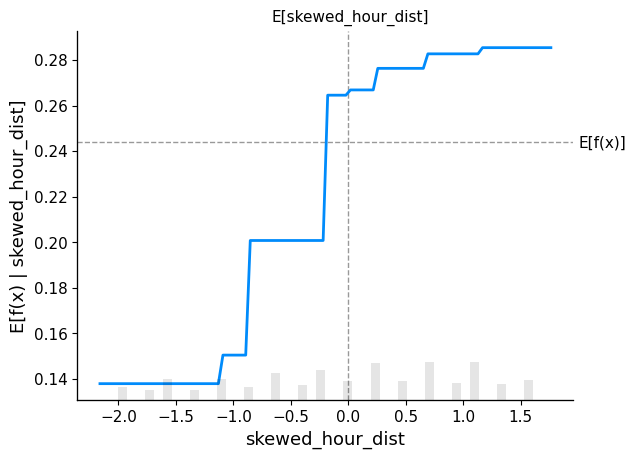

In [44]:

import os
import shap
import warnings
import matplotlib.pyplot as plt
def model_tf_proba(x):
   return model_xgb.predict_proba(x)[:,1] 
def model_tf_log_odds(x):
    p=model_xgb.predict_log_proba(x)
    return p[:,1]-p[:,0]

fig,ax=shap.partial_dependence_plot(
    'skewed_hour_dist', model_tf_proba, X_train, model_expected_value=True, 
    feature_expected_value=True, show=False, ice=False
)
# Cechy do wyboru:
# ['Negative_VADER', 'skewed_hour_dist', 'Weekday', 'Compound_VADER',
#                     'skewed_week_dist', 'w2v_11', 'Mentions', 'Polarity_TB', 'w2v_27',
#                     'w2v_53', 'Hour', 'w2v_44', 'w2v_84', 'embedding_16', 'w2v_47',
#                     'Positive_VADER', 'embedding_239', 'Length', 'embedding_284',
#                     'embedding_263', 'embedding_153', 'embedding_301', 'w2v_76',
#                     'embedding_220', 'embedding_366', 'w2v_29', 'w2v_61', 'embedding_28',
#                     'embedding_168', 'embedding_272', 'embedding_253', 'embedding_85',
#                     'embedding_285', 'w2v_12', 'w2v_31', 'embedding_120', 'embedding_254',
#                     'w2v_73', 'w2v_67', 'embedding_174', 'embedding_225', 'embedding_297',
#                     'embedding_68', 'embedding_211', 'embedding_178']


In [38]:
explainer=shap.Explainer(model_xgb, X_train)
shap_values=explainer(X_train)

100%|===================| 7986/8000 [00:15<00:00]        

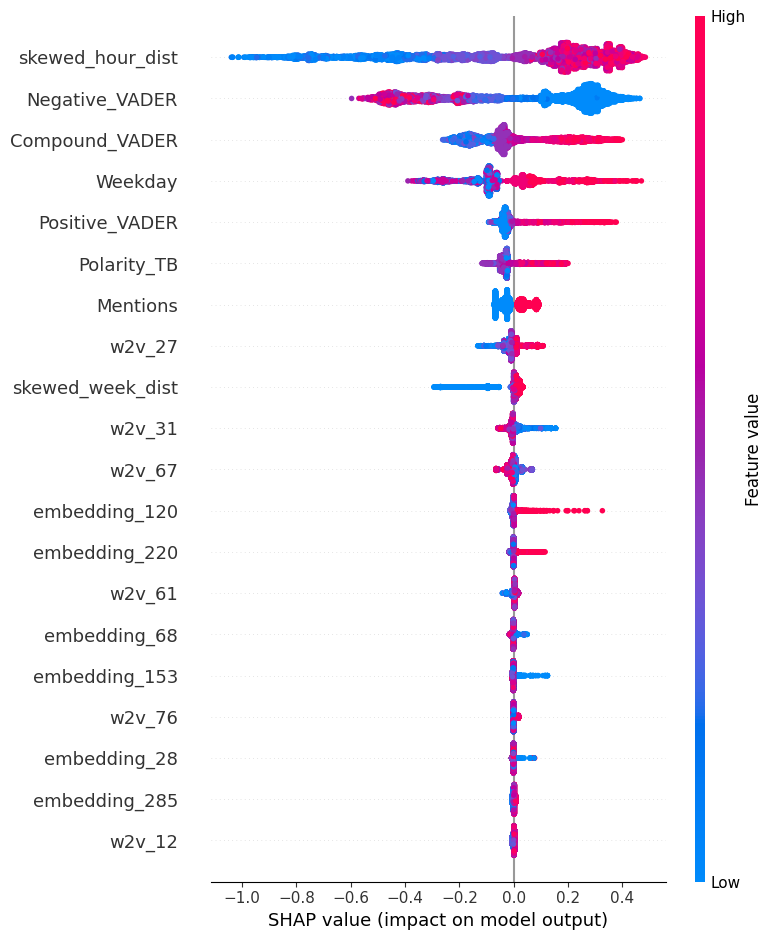

In [39]:
shap.summary_plot(shap_values,X_train)

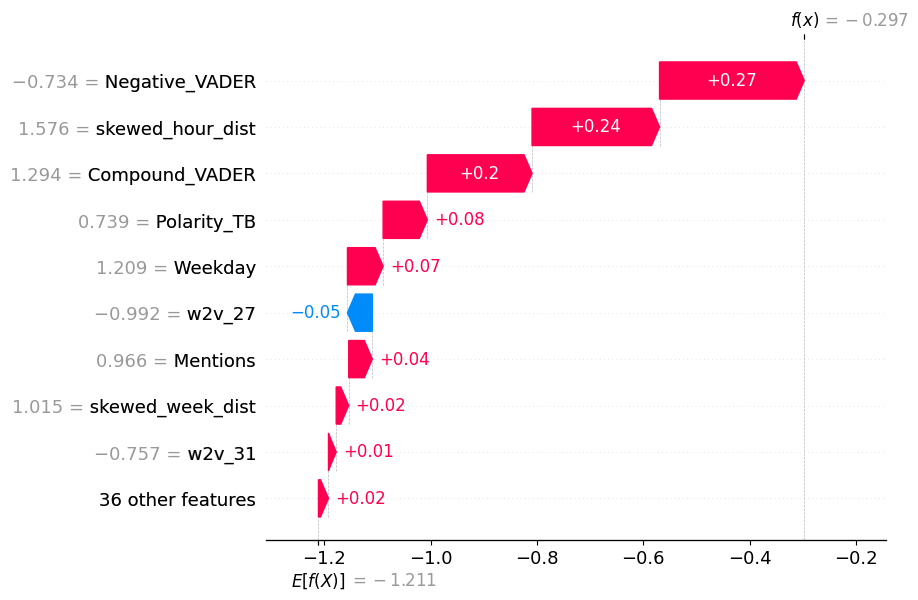

In [40]:
shap.plots.waterfall(shap_values[10]) #można się pobawić dla różnych wierszy

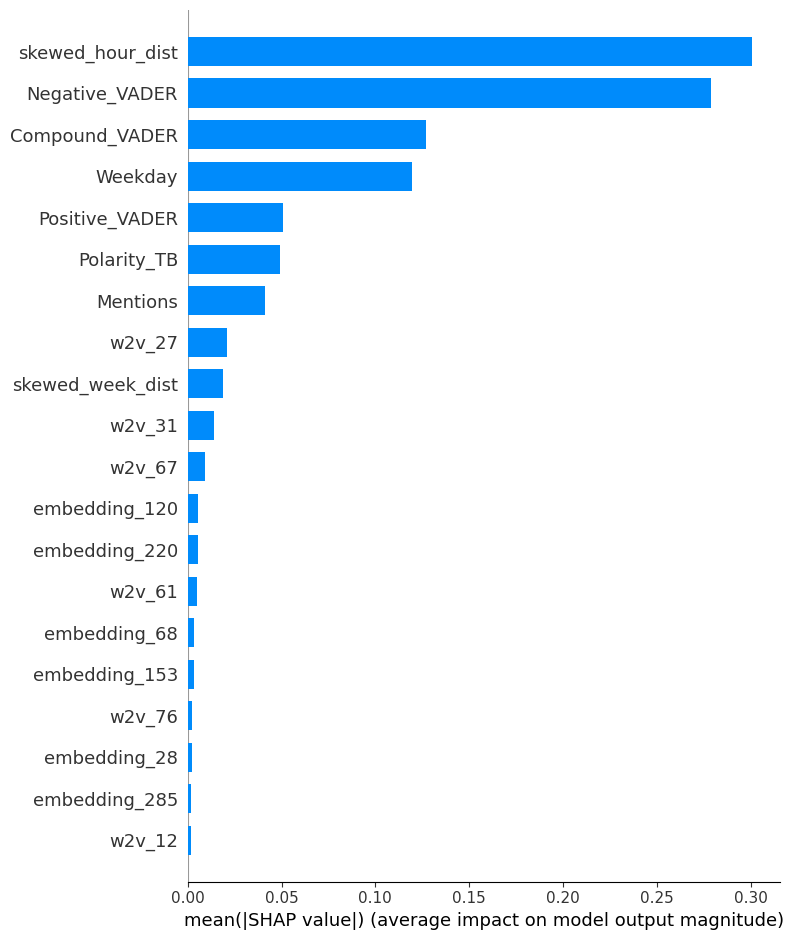

In [45]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

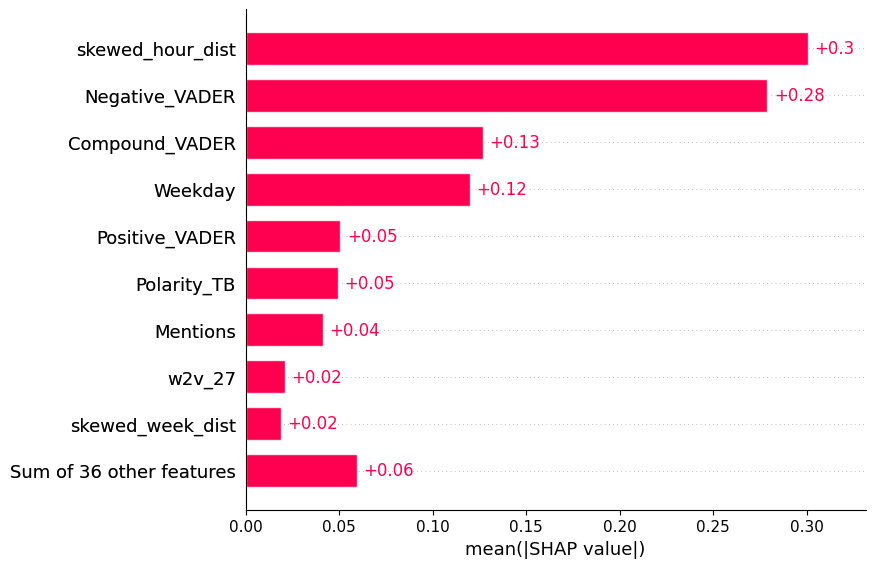

In [46]:
shap.plots.bar(shap_values)

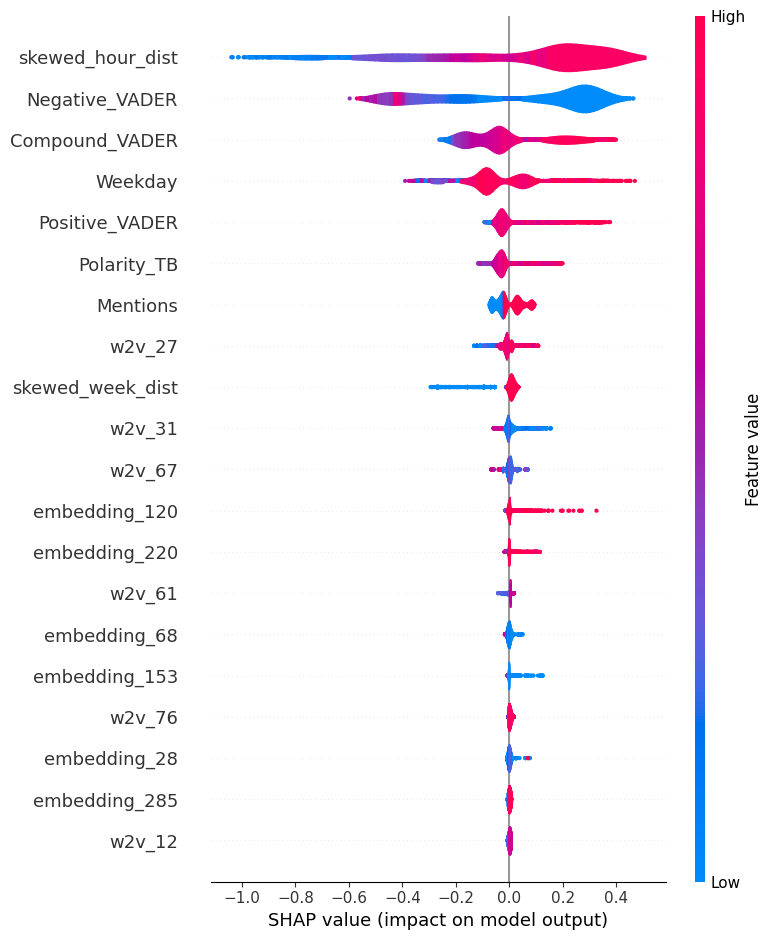

In [47]:
shap.summary_plot(shap_values, plot_type='violin') #Stradivarius normalnie

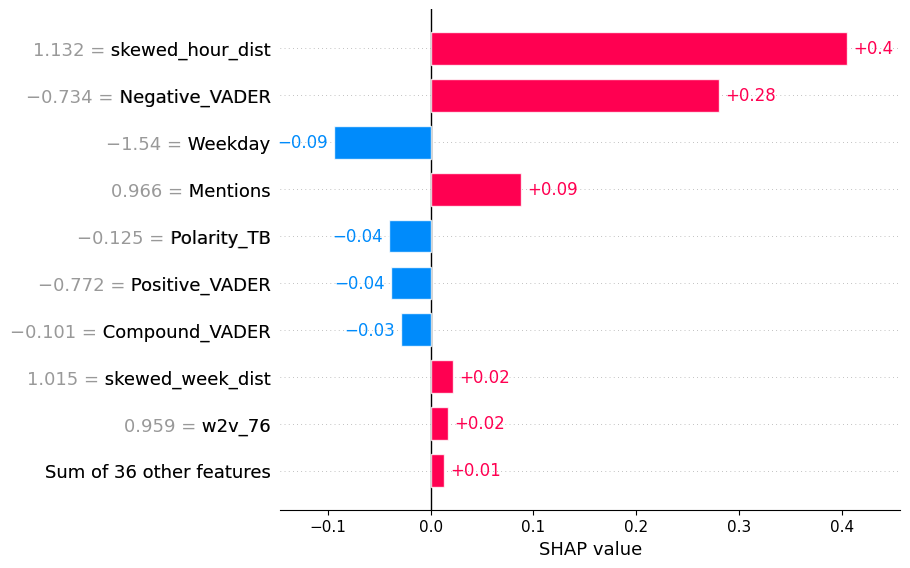

In [48]:
shap.plots.bar(shap_values[0])

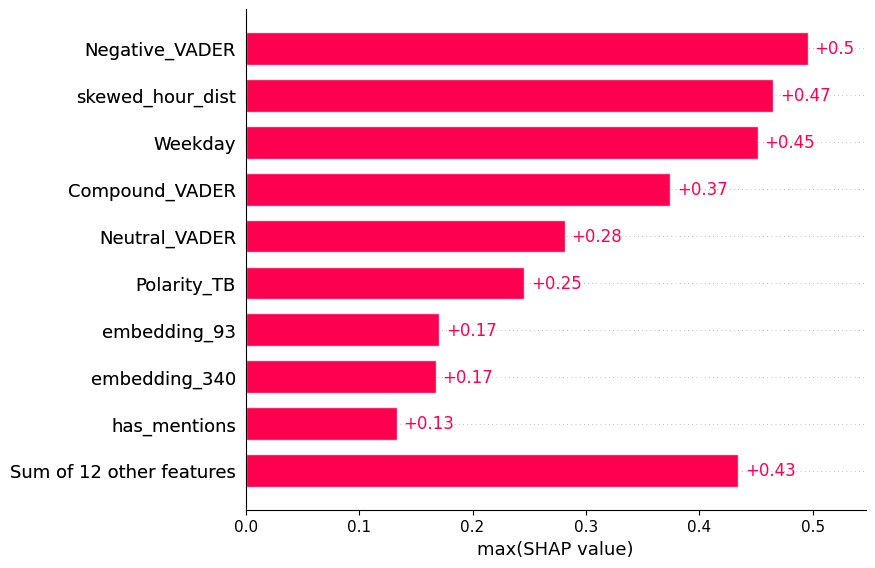

In [15]:
shap.plots.bar(shap_values.max(axis=0))

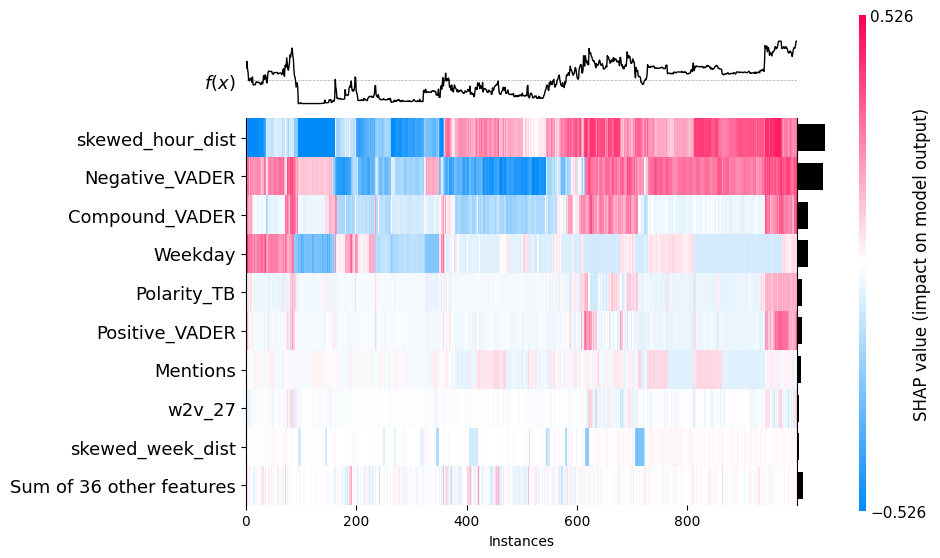

In [57]:
shap.plots.heatmap(shap_values[:1000]) #Tworzenie się heatmapy trwa ruski rok

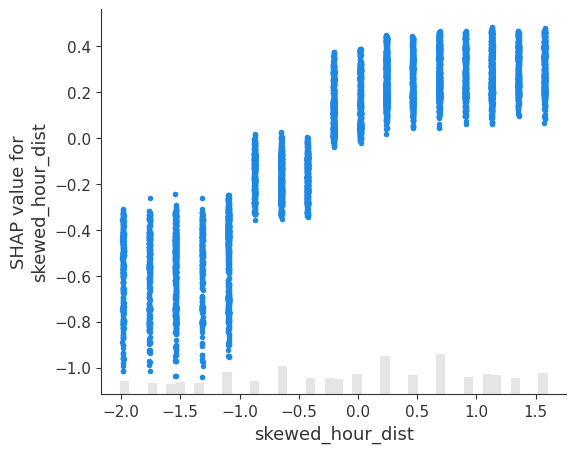

In [49]:
shap.plots.scatter(shap_values[:,"skewed_hour_dist"])

In [54]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[:300], X_train[:300], feature_names = X_train.columns)

## Siatka

In [61]:
explainer2=shap.Explainer(model_tensor, X)
shap_values=explainer2(X)

PermutationExplainer explainer: 10001it [14:45, 11.15it/s]                                                    


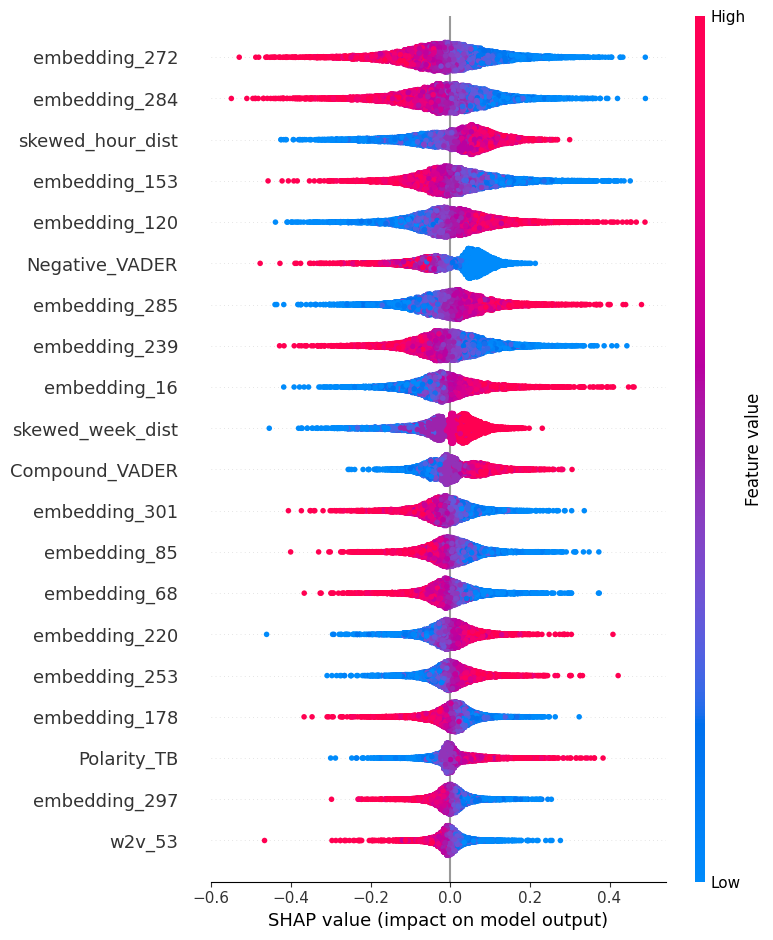

In [62]:
shap.summary_plot(shap_values,X)

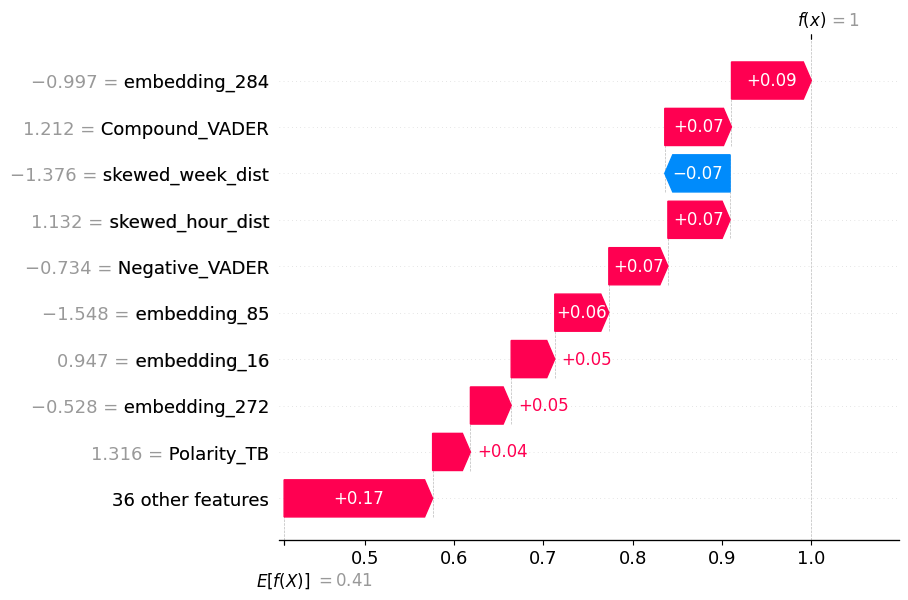

In [63]:
shap.plots.waterfall(shap_values[1])

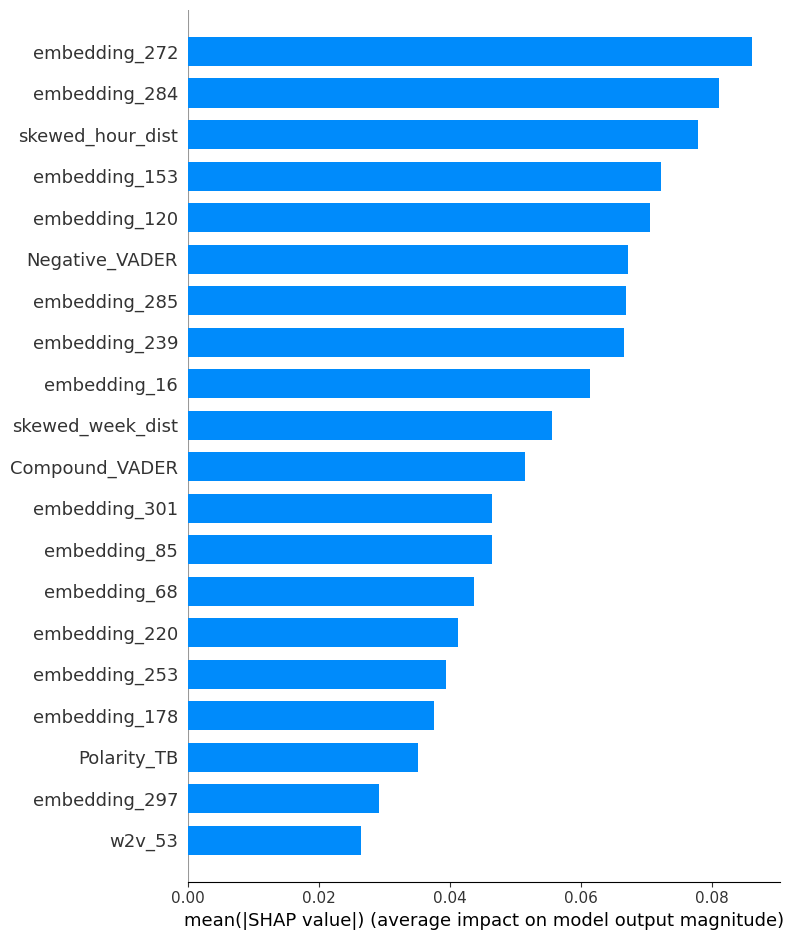

In [64]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

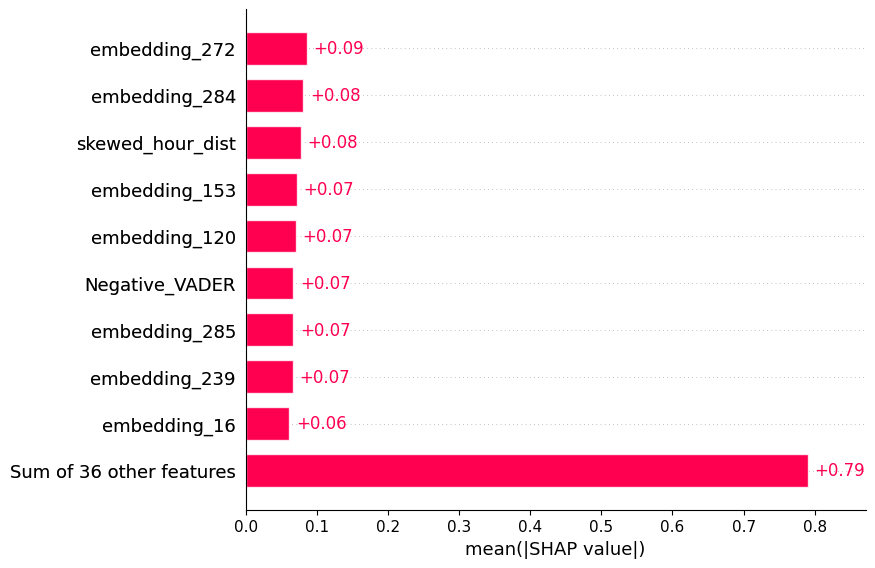

In [65]:
shap.plots.bar(shap_values)


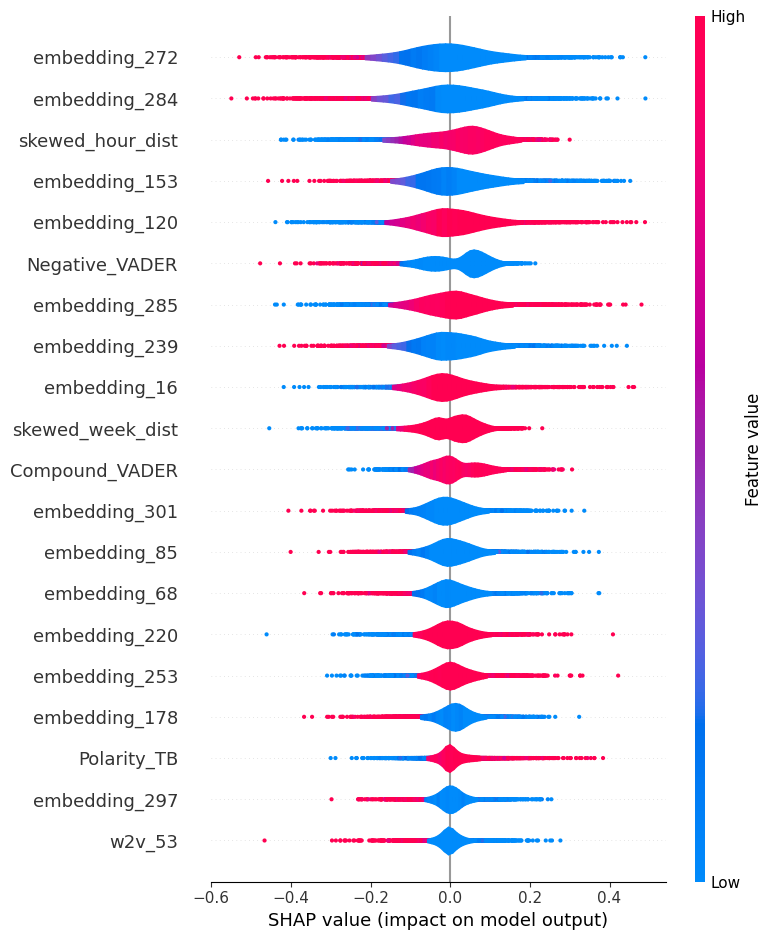

In [66]:
shap.summary_plot(shap_values, plot_type='violin')

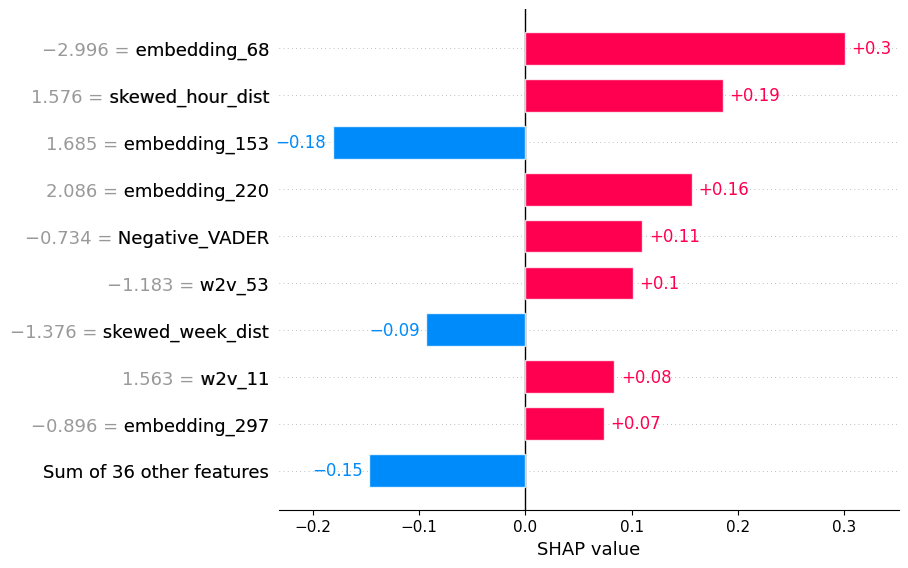

In [67]:
shap.plots.bar(shap_values[0])

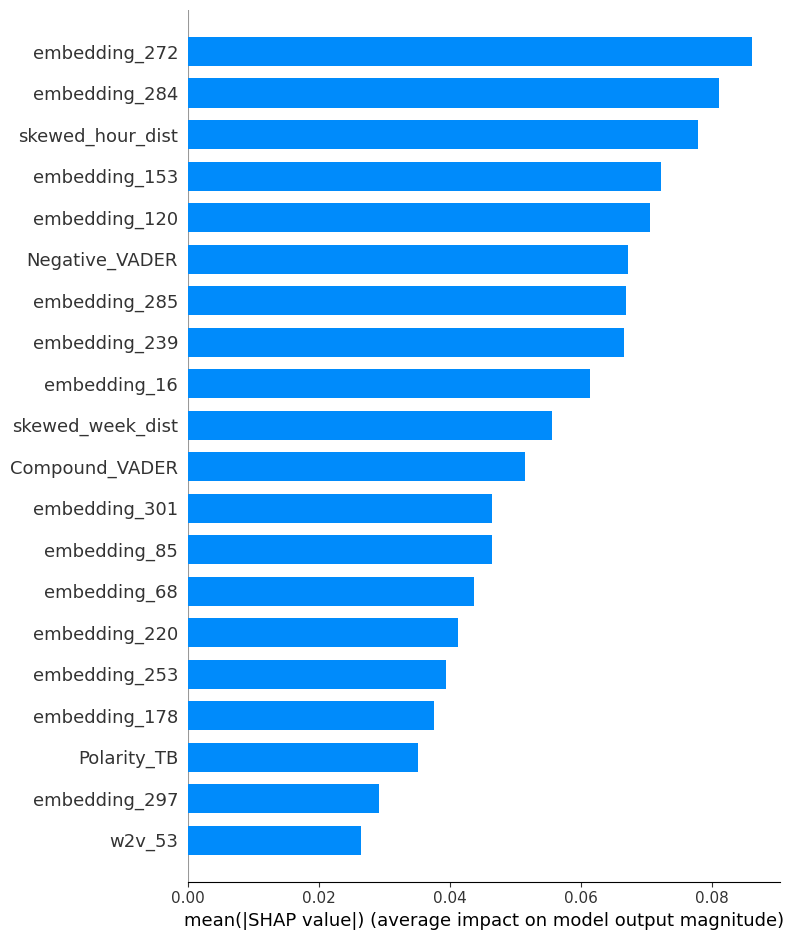

In [68]:
shap.summary_plot(shap_values, plot_type="bar")

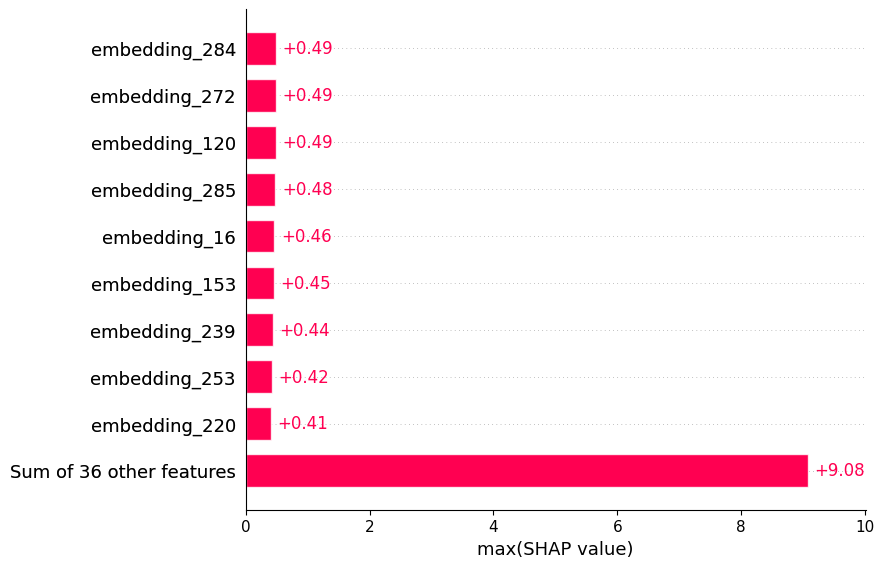

In [69]:
shap.plots.bar(shap_values.max(axis=0))

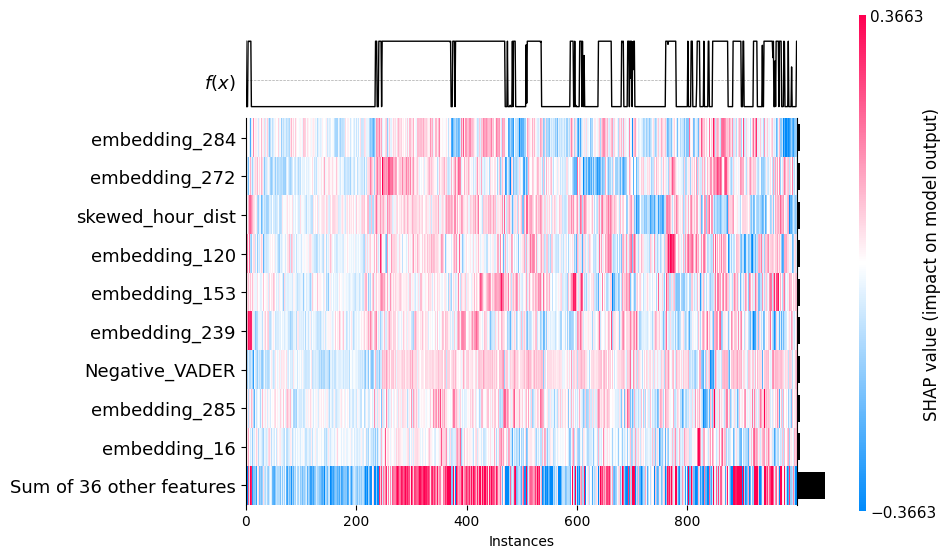

In [70]:
shap.plots.heatmap(shap_values[:1000])

In [73]:
# partial dependency, scatter, i force dla sieci nie działają

AttributeError: 'PermutationExplainer' object has no attribute 'expected_value'

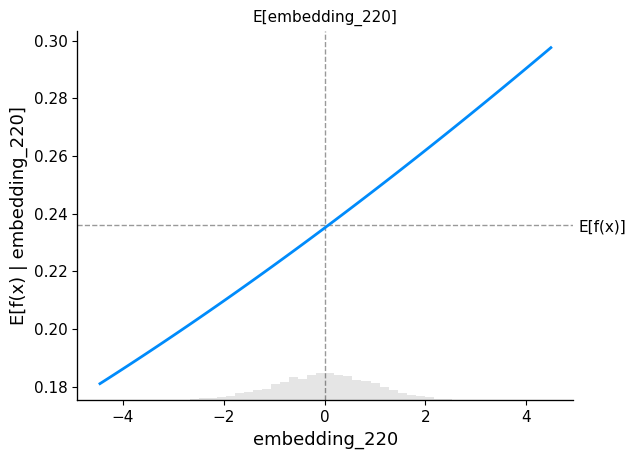

In [10]:
import os
import shap
import warnings
import matplotlib.pyplot as plt
def model_lr_proba(x):
    return model_lr.predict_proba(x)[:, 1]

def model_lr_log_odds(x):
    p = model_lr.predict_log_proba(x)
    return p[:,1] - p[:,0]

fig,ax = shap.partial_dependence_plot(
    'embedding_220', model_lr_proba, X_train, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)
# Cechy do wyboru:
# ['Negative_VADER', 'skewed_hour_dist', 'Weekday', 'Compound_VADER',
#                     'skewed_week_dist', 'w2v_11', 'Mentions', 'Polarity_TB', 'w2v_27',
#                     'w2v_53', 'Hour', 'w2v_44', 'w2v_84', 'embedding_16', 'w2v_47',
#                     'Positive_VADER', 'embedding_239', 'Length', 'embedding_284',
#                     'embedding_263', 'embedding_153', 'embedding_301', 'w2v_76',
#                     'embedding_220', 'embedding_366', 'w2v_29', 'w2v_61', 'embedding_28',
#                     'embedding_168', 'embedding_272', 'embedding_253', 'embedding_85',
#                     'embedding_285', 'w2v_12', 'w2v_31', 'embedding_120', 'embedding_254',
#                     'w2v_73', 'w2v_67', 'embedding_174', 'embedding_225', 'embedding_297',
#                     'embedding_68', 'embedding_211', 'embedding_178']

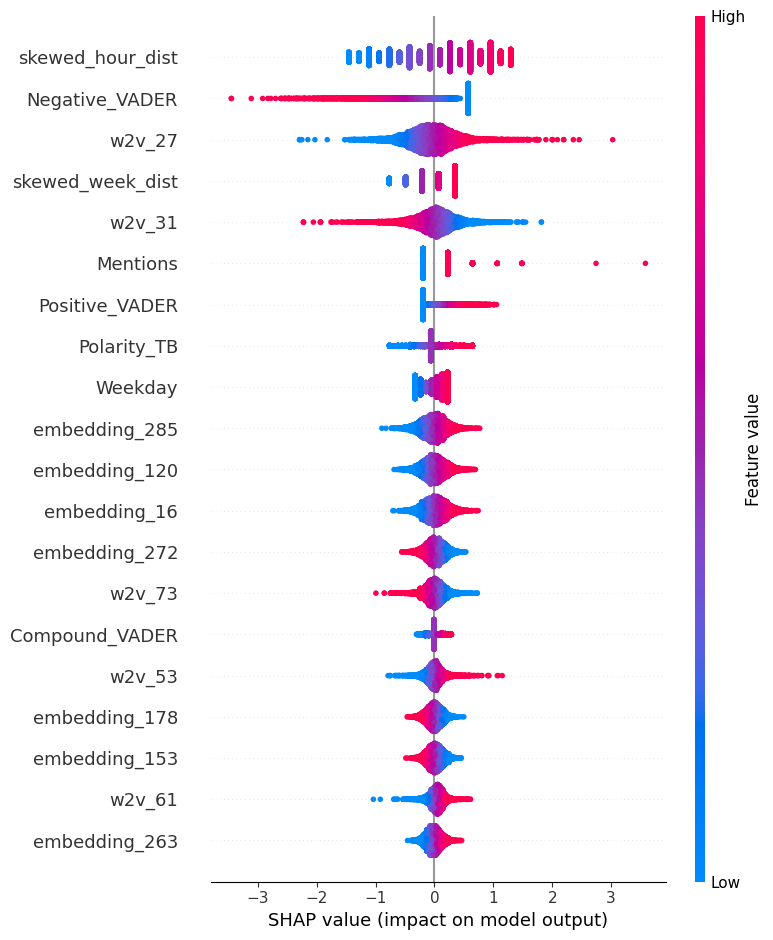

In [11]:
explainer_lr = shap.Explainer(model_lr, X_train)
    
shap_values_lr = explainer_lr(X_train)
shap.summary_plot(shap_values_lr, X_train)

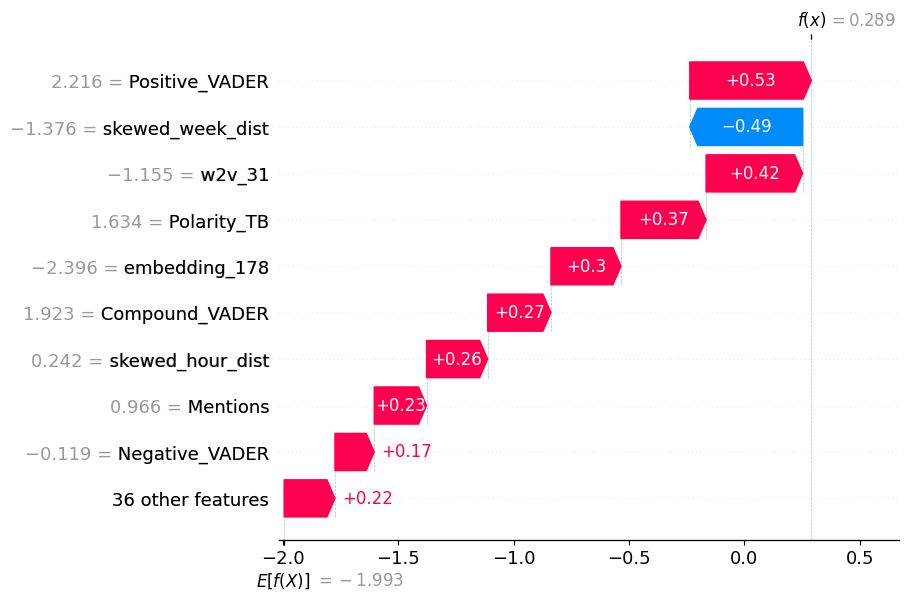

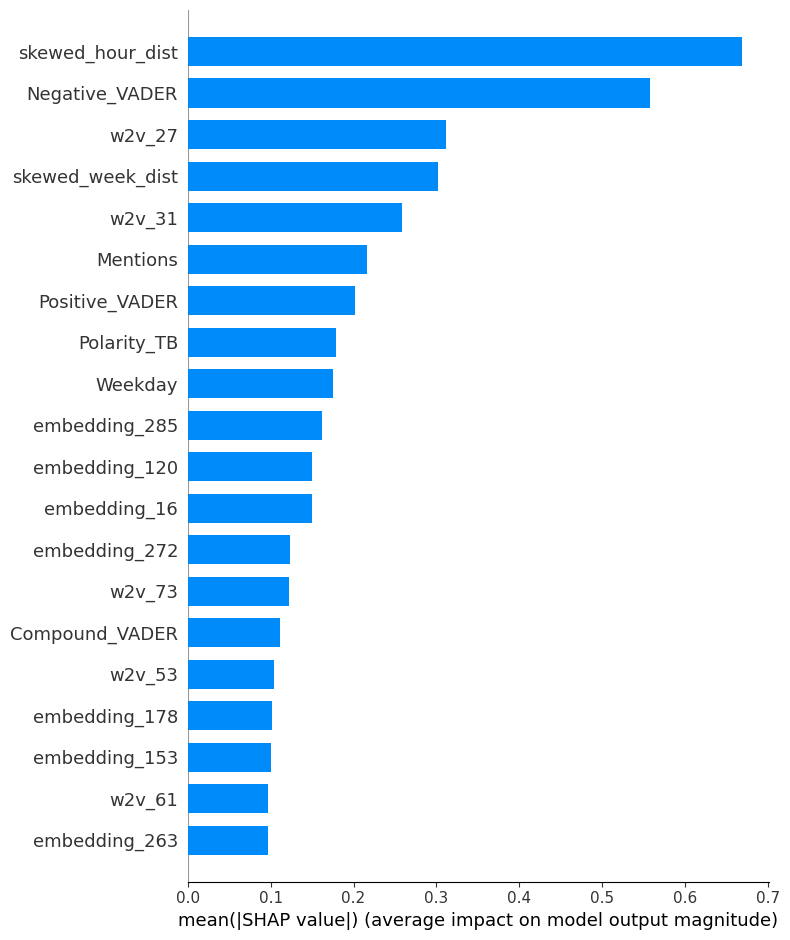

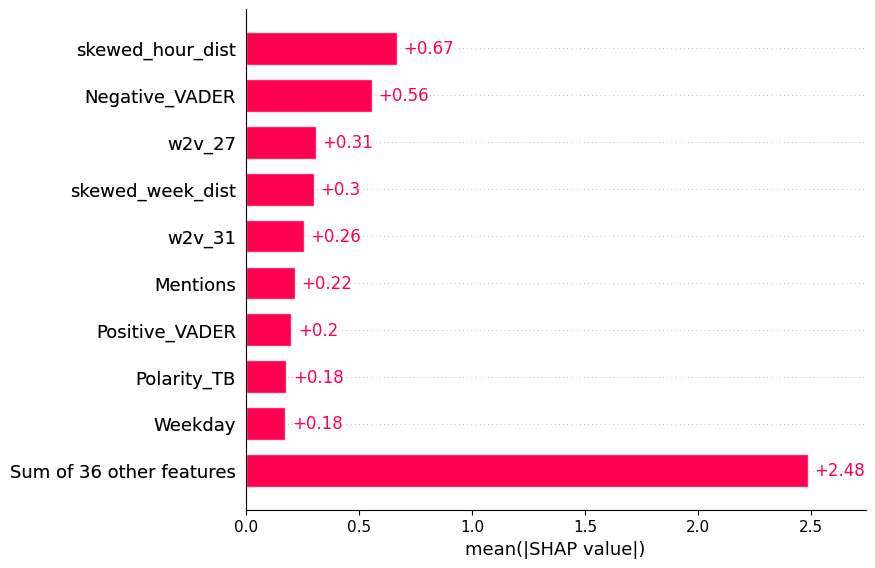

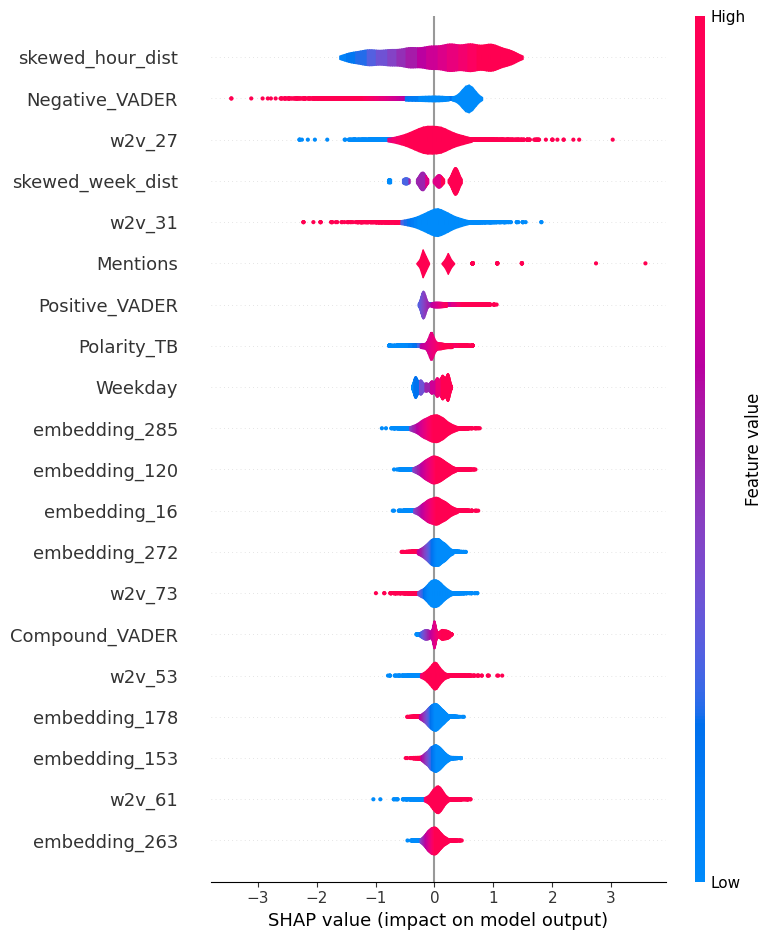

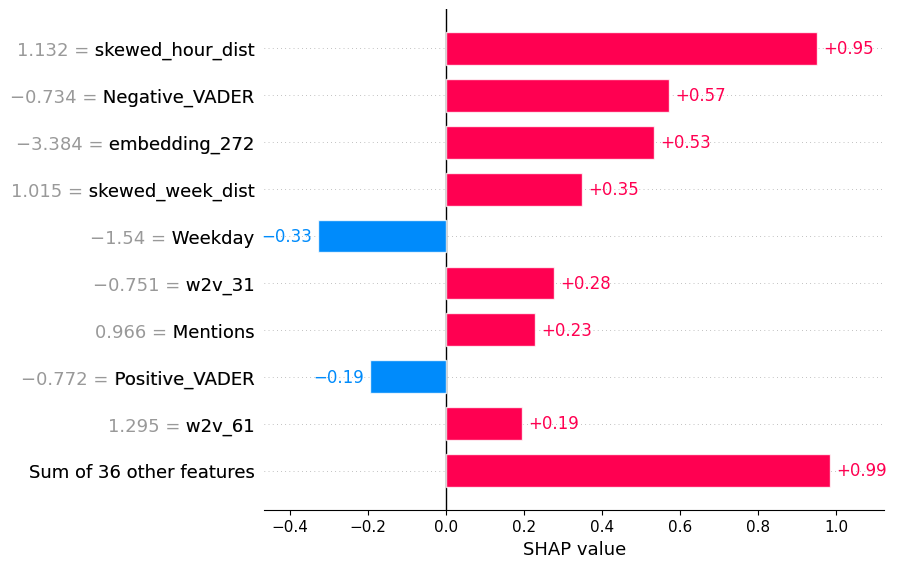

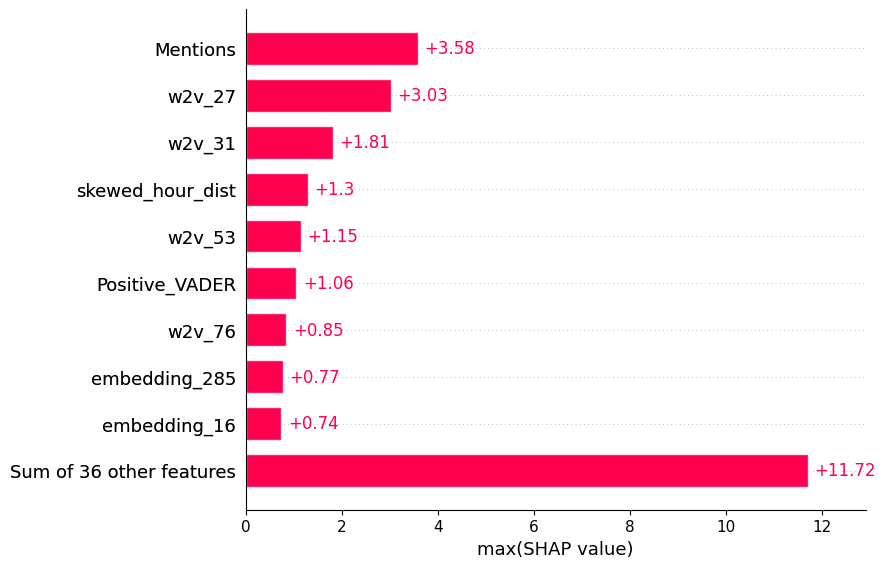

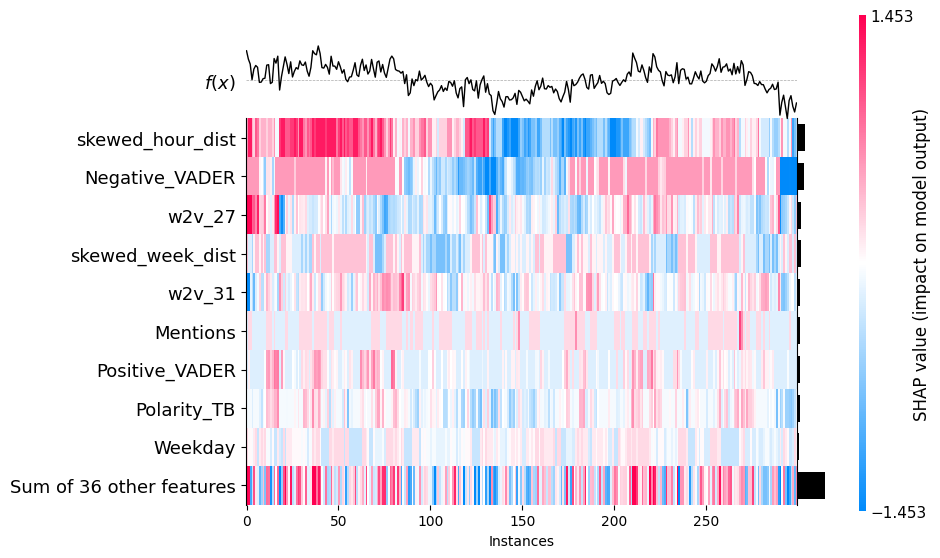

In [12]:
shap.plots.waterfall(shap_values_lr[1])
shap.summary_plot(shap_values_lr, X_train, plot_type="bar")
shap.plots.bar(shap_values_lr)
shap.summary_plot(shap_values_lr, plot_type='violin')
shap.plots.bar(shap_values_lr[0])
shap.plots.bar(shap_values_lr.max(axis=0))
shap.plots.heatmap(shap_values_lr[:300])

In [14]:
shap.initjs()
shap.force_plot(explainer_lr.expected_value, shap_values_lr.values[:500], X_train[:500], feature_names = X_train.columns)